In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
WORKING_DIR = os.getcwd()
BASE_DIR = os.path.dirname(WORKING_DIR)
DATA_DIR = os.path.join(BASE_DIR, 'data')
CACHE = os.path.join(DATA_DIR, 'cache')

In [3]:
positions_df = pd.read_csv(f'{CACHE}/positions.csv')

In [4]:
positions_df.columns

Index(['vehicle_0_pos', 'vehicle_1_pos', 'vehicle_10_pos', 'vehicle_11_pos',
       'vehicle_12_pos', 'vehicle_13_pos', 'vehicle_14_pos', 'vehicle_15_pos',
       'vehicle_16_pos', 'vehicle_17_pos', 'vehicle_19_pos', 'vehicle_2_pos',
       'vehicle_4_pos', 'vehicle_5_pos', 'vehicle_6_pos', 'vehicle_7_pos',
       'vehicle_8_pos'],
      dtype='object')

In [5]:
cols = [f'veh_{num+1}_pos' for num in range(17)]

In [6]:
positions_df.columns = cols

In [7]:
positions_df.head(n=2)

,veh_1_pos,veh_2_pos,veh_3_pos,veh_4_pos,veh_5_pos,veh_6_pos,veh_7_pos,veh_8_pos,veh_9_pos,veh_10_pos,veh_11_pos,veh_12_pos,veh_13_pos,veh_14_pos,veh_15_pos,veh_16_pos,veh_17_pos
0,643.23,362.75,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55,186.78,99.19,55.45,30.70,18.04,5.10
1,655.90,370.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44,199.25,103.51,61.61,36.01,24.82,6.55


In [8]:
speeds_df = pd.read_csv(f'{CACHE}/speeds.csv')

In [9]:
cols = [f'veh_{num+1}_speed' for num in range(17)]

In [10]:
speeds_df.columns = cols

In [11]:
speeds_df.head(n=2)

,veh_1_speed,veh_2_speed,veh_3_speed,veh_4_speed,veh_5_speed,veh_6_speed,veh_7_speed,veh_8_speed,veh_9_speed,veh_10_speed,veh_11_speed,veh_12_speed,veh_13_speed,veh_14_speed,veh_15_speed,veh_16_speed,veh_17_speed
0,12.13,6.92,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55,11.54,6.16,6.93,4.33,5.77,0.00
1,12.66,7.80,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88,12.47,4.32,6.16,5.32,6.78,1.45


In [12]:
positions_df.describe().T

,count,mean,std,min,25%,50%,75%,max
veh_1_pos,1471.0,9734.277954,5256.679260,643.23,5188.385,9735.28,14280.150,18834.73
veh_2_pos,1471.0,5687.040945,3078.252727,362.75,3028.210,5681.29,8351.420,11015.41
veh_3_pos,1471.0,8037.725221,4373.437348,476.04,4258.225,8035.68,11821.135,15600.91
veh_4_pos,1471.0,10347.356669,5661.316425,551.59,5446.580,10349.35,15242.630,20134.59
veh_5_pos,1471.0,8607.660897,4722.589883,441.71,4517.650,8605.82,12691.955,16781.60
veh_6_pos,1471.0,2145.438973,1172.978019,113.18,1132.315,2146.09,3163.605,4172.85
veh_7_pos,1471.0,9026.047573,5001.275834,383.10,4697.655,9025.00,13352.910,17682.90
veh_8_pos,1471.0,3888.386451,2148.149805,167.00,2031.300,3896.30,5745.280,7599.82
veh_9_pos,1471.0,5520.753861,3073.598447,203.39,2861.155,5519.55,8177.865,10846.83
veh_10_pos,1471.0,2939.884405,1636.909954,104.06,1528.430,2935.61,4360.665,5771.03


## Transformations for position data

In [13]:
mean = positions_df.mean(axis=0)
std = positions_df.std(axis=0)

positions_df_out = positions_df - mean
positions_df_out = positions_df_out / std

In [14]:
positions_df.head(n=3)

,veh_1_pos,veh_2_pos,veh_3_pos,veh_4_pos,veh_5_pos,veh_6_pos,veh_7_pos,veh_8_pos,veh_9_pos,veh_10_pos,veh_11_pos,veh_12_pos,veh_13_pos,veh_14_pos,veh_15_pos,veh_16_pos,veh_17_pos
0,643.23,362.75,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55,186.78,99.19,55.45,30.70,18.04,5.10
1,655.90,370.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44,199.25,103.51,61.61,36.01,24.82,6.55
2,668.23,378.11,497.09,578.71,464.19,119.14,406.73,177.03,218.35,111.52,222.21,211.16,107.05,67.78,40.62,32.47,9.50


In [15]:
positions_df_out.head(n=3)

,veh_1_pos,veh_2_pos,veh_3_pos,veh_4_pos,veh_5_pos,veh_6_pos,veh_7_pos,veh_8_pos,veh_9_pos,veh_10_pos,veh_11_pos,veh_12_pos,veh_13_pos,veh_14_pos,veh_15_pos,veh_16_pos,veh_17_pos
0,-1.729428,-1.729647,-1.729003,-1.730298,-1.729126,-1.732564,-1.728149,-1.732368,-1.730013,-1.732425,-1.730562,-1.732236,-1.705467,-1.724678,-1.725639,-1.730090,-1.723881
1,-1.727018,-1.727113,-1.726536,-1.727947,-1.726760,-1.730134,-1.725685,-1.730213,-1.727530,-1.729853,-1.728220,-1.729753,-1.704394,-1.722535,-1.723003,-1.727928,-1.723405
2,-1.724672,-1.724657,-1.724190,-1.725508,-1.724365,-1.727482,-1.723424,-1.727699,-1.725145,-1.727868,-1.725905,-1.727382,-1.703514,-1.720388,-1.720714,-1.725488,-1.722436


In [16]:
assert round(float(positions_df.loc[0, 'veh_1_pos'] - positions_df.loc[:, 'veh_1_pos'].mean())/(positions_df.loc[:, 'veh_1_pos'].std()), 3) == round(float(positions_df_out.iloc[0, 0]), 3), "Invalid transformation"

## Transformations for speed data

In [17]:
def mean_std_test(series, window_size):
    plt.figure(figsize=(18,5)) # width, height
    rolling_mean = series.rolling(window_size).mean()
    rolling_std = series.rolling(window_size).std()
    
#     plt.plot(series[:500])
    plt.plot(rolling_mean[:500])
    plt.plot(rolling_std[:500])
    plt.xlabel("Time")
    plt.ylabel("Mean Speed")
    plt.title('Rolling Statistics')
    plt.legend(['Rolling mean', 'Rolling std'])
    plt.show()
    
def adfuller_test(dataframe):
    # Dickey-Fuller test
    test_statistic, p_value, _, _, critical_values, _ = adfuller(dataframe, autolag='AIC')
    print('Test statistic: ', test_statistic)
    print('p-value: ', p_value)
    print('Critical Values:', critical_values)

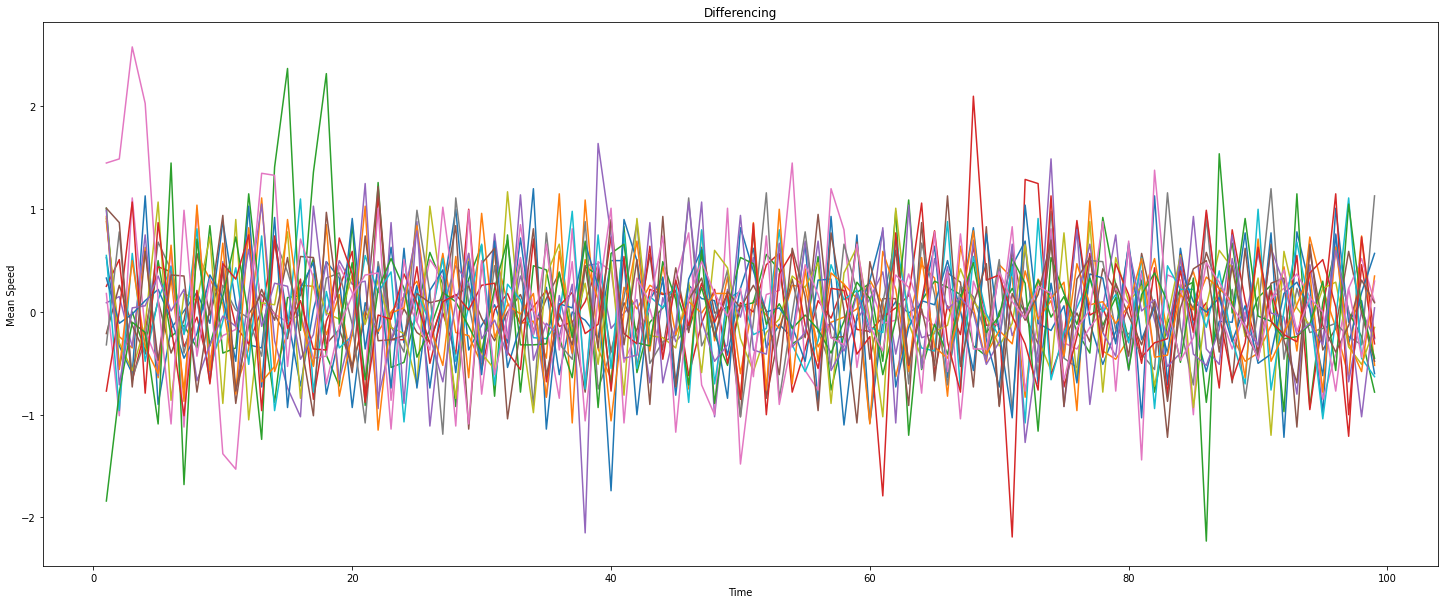

In [18]:
# differencing 
diff = speeds_df - speeds_df.shift()
plt.figure(figsize=(25,10))
plt.plot(diff.iloc[:100, :])
plt.title("Differencing") 
plt.xlabel("Time")
plt.ylabel("Mean Speed")
plt.show()

- most vehicles are now almost constand around the mean by speculation

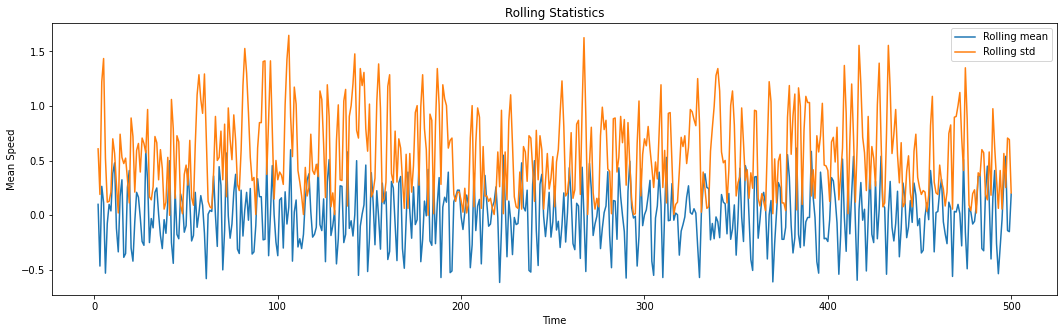

Test statistic:  -13.10079986404571
p-value:  1.7115498458127875e-24
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





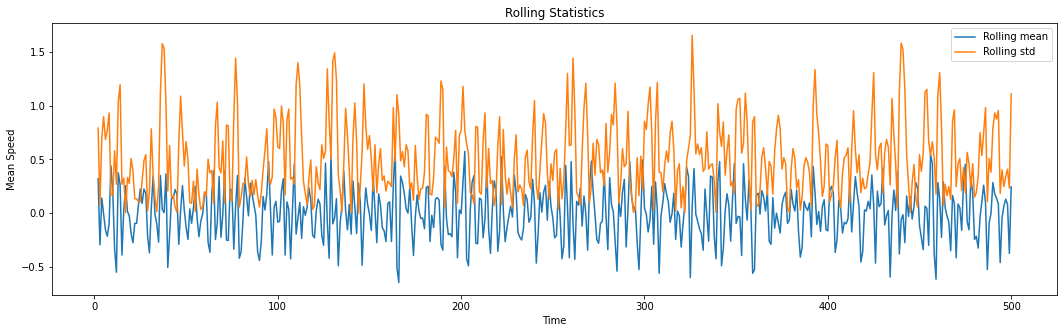

Test statistic:  -14.264945395418787
p-value:  1.40581548979424e-26
Critical Values: {'1%': -3.434874123222469, '5%': -2.8635380960841084, '10%': -2.5678337706609993}





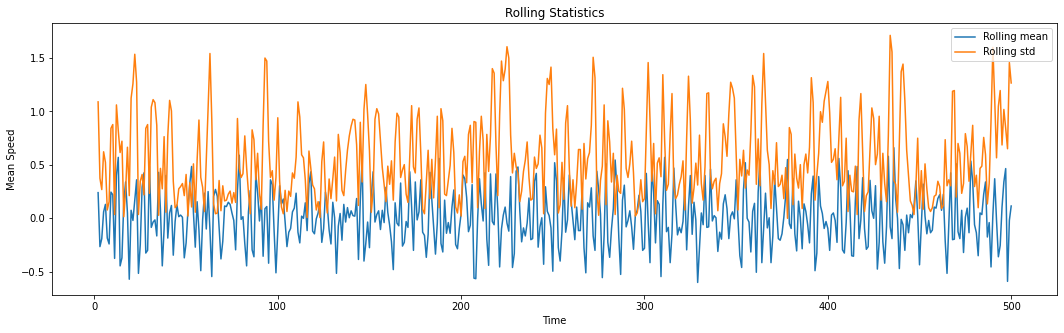

Test statistic:  -12.881374083005527
p-value:  4.651112298052974e-24
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





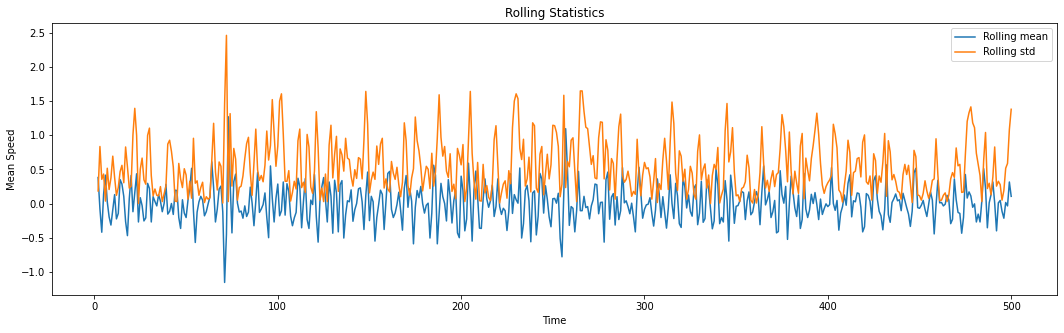

Test statistic:  -13.597509421267015
p-value:  1.9820230060519128e-25
Critical Values: {'1%': -3.434874123222469, '5%': -2.8635380960841084, '10%': -2.5678337706609993}





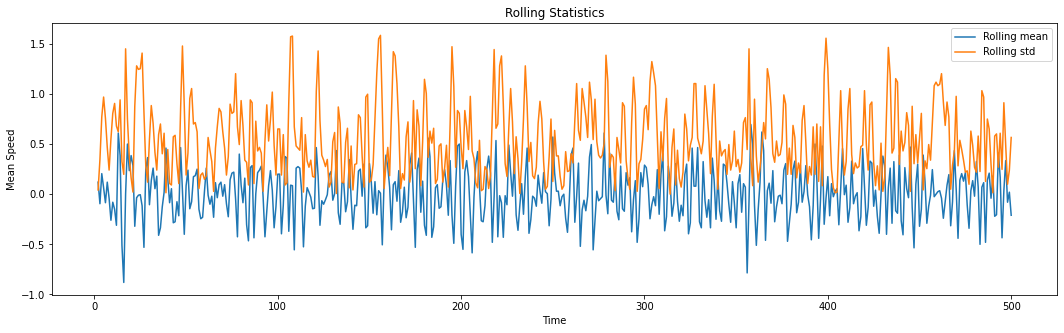

Test statistic:  -14.465708169255112
p-value:  6.732573770764491e-27
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





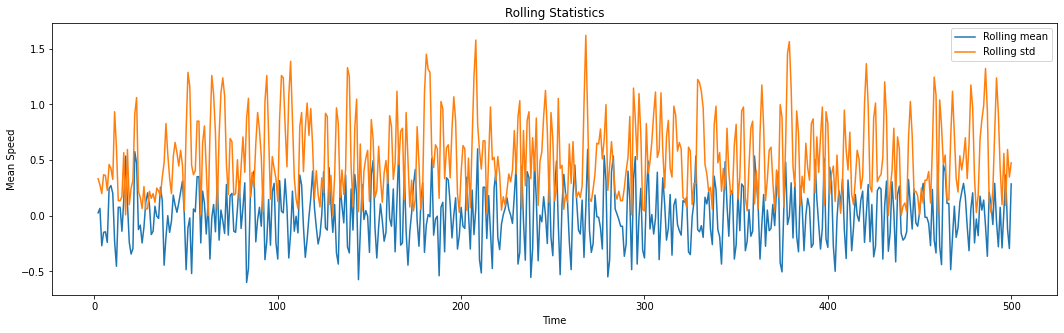

Test statistic:  -13.922661075139782
p-value:  5.261127131044935e-26
Critical Values: {'1%': -3.434880391815318, '5%': -2.8635408625359315, '10%': -2.5678352438452814}





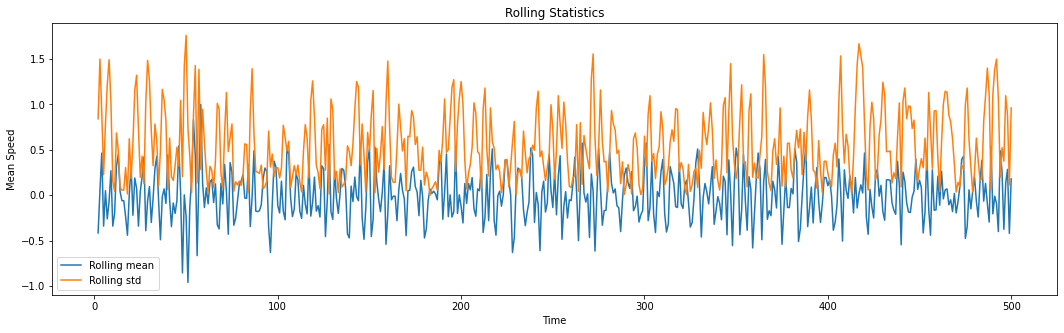

Test statistic:  -12.969351915181967
p-value:  3.104691642009797e-24
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





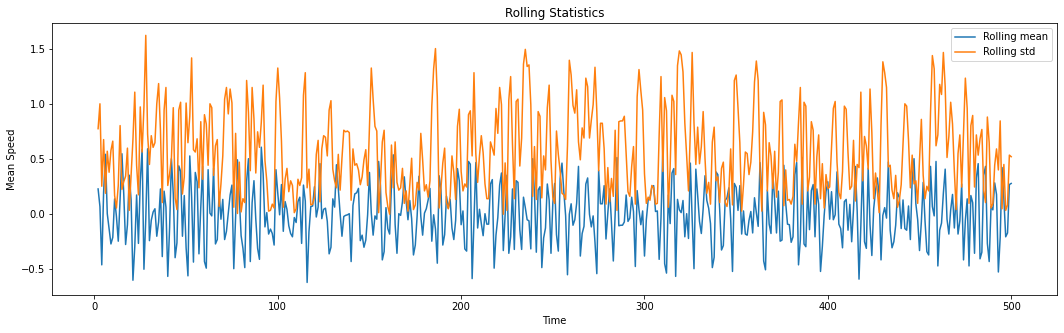

Test statistic:  -14.135258254741185
p-value:  2.2960775292059454e-26
Critical Values: {'1%': -3.4348772553489617, '5%': -2.8635394783531085, '10%': -2.5678345067434516}





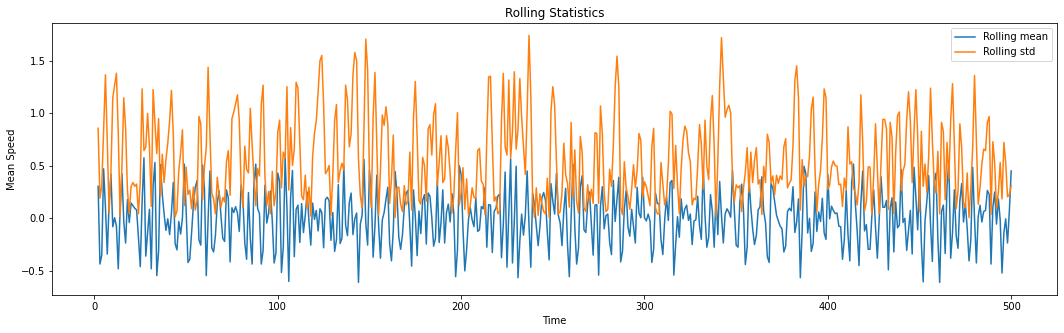

Test statistic:  -14.435771205202473
p-value:  7.500236278252173e-27
Critical Values: {'1%': -3.4348678719530934, '5%': -2.863535337271721, '10%': -2.5678323015457787}





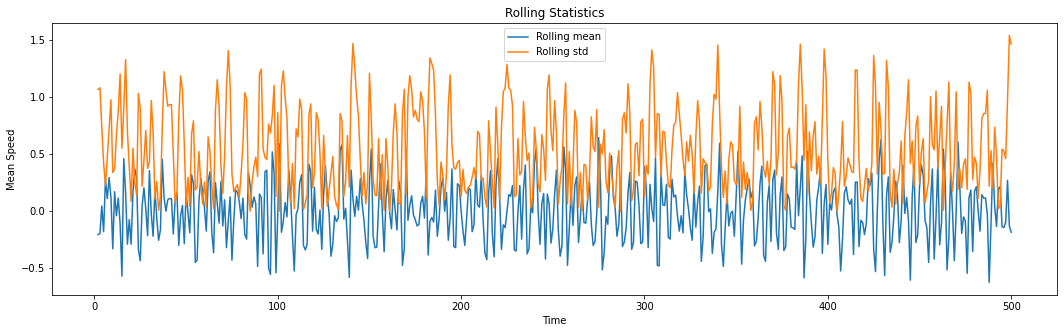

Test statistic:  -13.95091702968763
p-value:  4.7038615585812155e-26
Critical Values: {'1%': -3.4348772553489617, '5%': -2.8635394783531085, '10%': -2.5678345067434516}





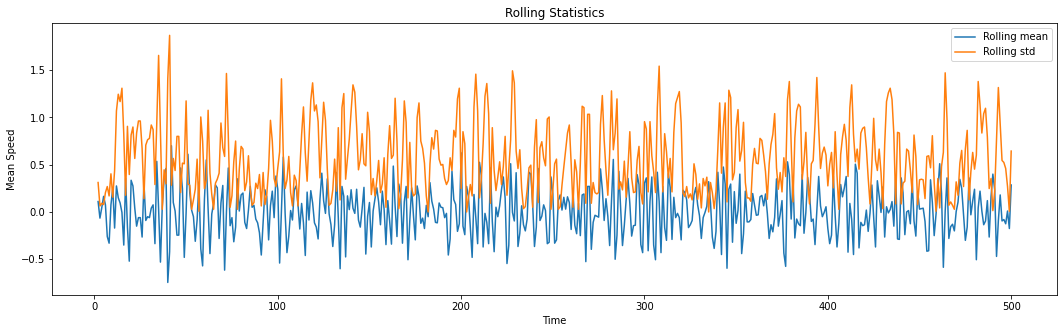

Test statistic:  -16.32911277910252
p-value:  3.073480912252644e-29
Critical Values: {'1%': -3.4348647527922824, '5%': -2.863533960720434, '10%': -2.567831568508802}





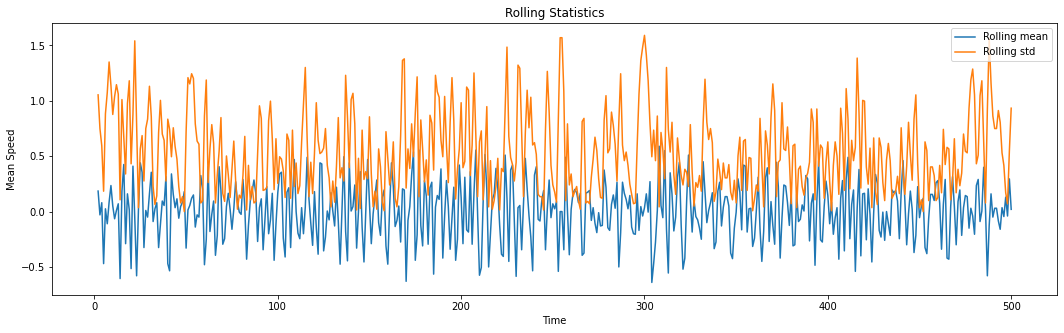

Test statistic:  -13.761484724769305
p-value:  1.0065907288728828e-25
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





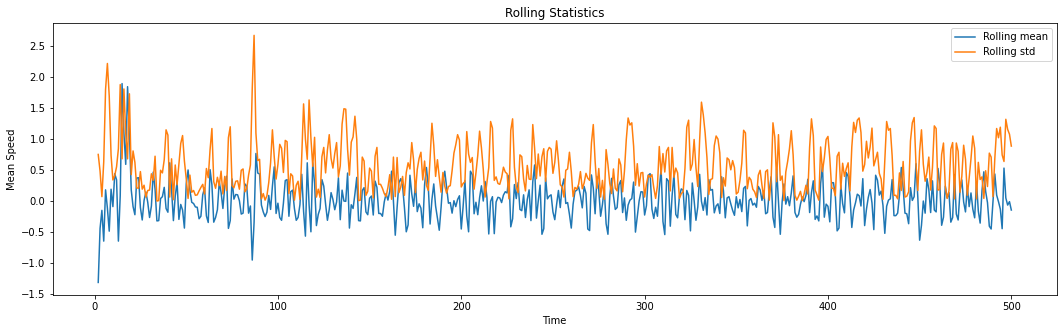

Test statistic:  -13.123408308341189
p-value:  1.5465098815893587e-24
Critical Values: {'1%': -3.4348399537053482, '5%': -2.8635230163107837, '10%': -2.5678257404326903}





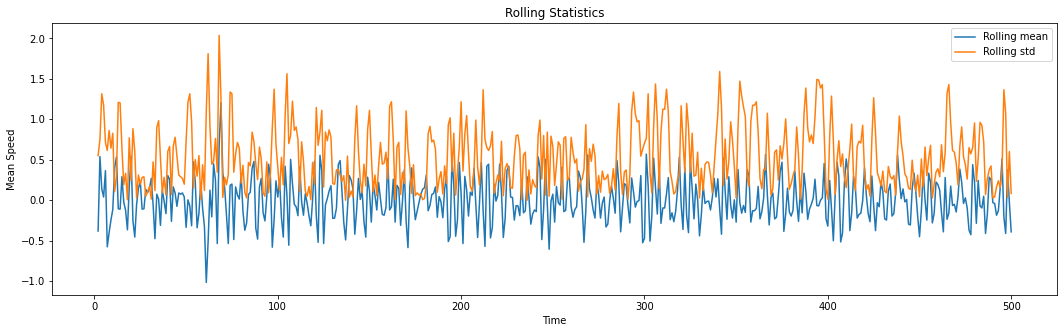

Test statistic:  -13.192758442121521
p-value:  1.1352703172090745e-24
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





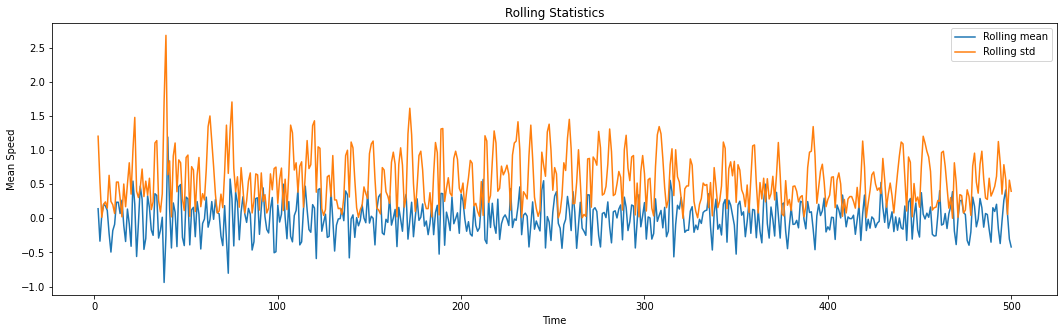

Test statistic:  -12.97167760143552
p-value:  3.0718815218366216e-24
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





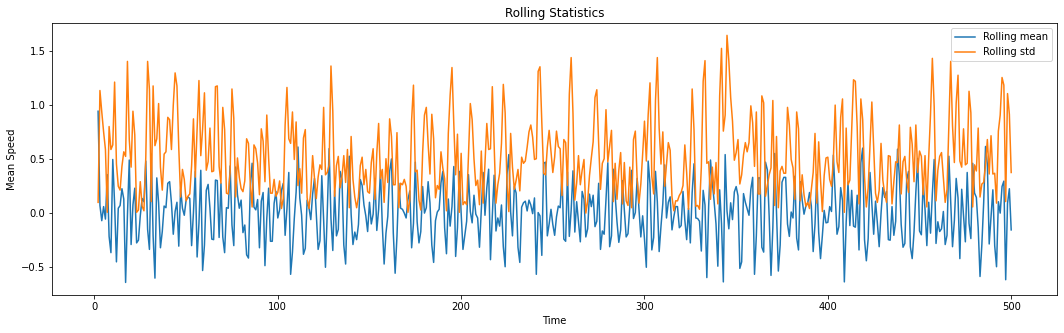

Test statistic:  -13.73827865908377
p-value:  1.1067140347235828e-25
Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}





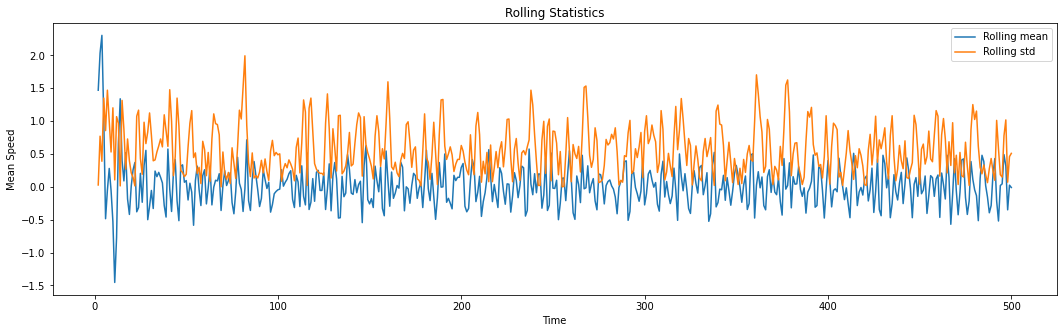

Test statistic:  -16.204806913399587
p-value:  4.0425523390870166e-29
Critical Values: {'1%': -3.434874123222469, '5%': -2.8635380960841084, '10%': -2.5678337706609993}





In [19]:
diff.dropna(inplace=True)

# check stationary: mean, variance(std) and adfuller test
for feature in diff.columns:
    mean_std_test(diff.loc[:, feature], 2)
    adfuller_test(diff.loc[:, feature])
    print('\n\n')

## Observations
- Rolling mean is constant by speculation
- Rolling standard deviation is constant, so constant variance condition is also satisfied
- All the vehicles satisfy the condition `Test statistics < Crictical values`, so seasonality/ trends are succefully avoided

>The data is now stationary, all stationarity tests are passed ✅


In [20]:
diff

,veh_1_speed,veh_2_speed,veh_3_speed,veh_4_speed,veh_5_speed,veh_6_speed,veh_7_speed,veh_8_speed,veh_9_speed,veh_10_speed,veh_11_speed,veh_12_speed,veh_13_speed,veh_14_speed,veh_15_speed,veh_16_speed,veh_17_speed
1,0.53,0.88,1.01,0.25,0.09,-0.21,0.18,-0.32,0.91,0.55,0.33,0.93,-1.84,-0.77,0.99,1.01,1.45
2,-0.33,-0.24,-0.53,0.51,0.15,0.26,-1.01,0.78,-0.30,-0.96,-0.11,-0.56,-0.78,0.01,-0.71,0.87,1.49
3,-0.60,-0.35,0.00,-0.67,-0.34,-0.13,1.11,-0.64,-0.57,0.57,-0.02,0.50,-0.10,1.07,0.04,-0.73,2.58
4,1.13,0.63,-0.38,-0.17,0.75,-0.41,-0.18,-0.28,-0.13,-0.48,0.11,-0.34,-0.20,-0.79,0.06,0.59,2.03
5,-0.90,-0.64,0.50,0.44,-0.62,0.11,-0.50,0.68,1.07,0.12,0.22,-0.60,-1.09,0.87,0.35,-0.47,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,1.07,0.43,-0.20,-1.03,0.92,0.99,-0.50,0.03,-0.39,-0.18,-0.25,-0.30,0.32,0.11,1.17,0.88,-0.61
1467,-0.56,-0.46,-0.57,0.92,0.21,-0.62,0.37,-0.30,-0.26,0.47,0.54,-0.41,-0.34,0.76,-0.17,-0.45,-0.13
1468,0.64,0.41,0.91,-0.11,-0.10,-0.14,0.36,0.13,-0.36,0.19,0.29,-0.22,0.22,-1.00,0.23,0.44,0.69
1469,-0.38,-0.14,-0.58,0.29,-0.62,-0.26,0.15,0.00,0.86,-0.07,0.33,-0.23,-0.68,0.40,-0.87,-0.35,-0.61


In [21]:
positions_df_out

,veh_1_pos,veh_2_pos,veh_3_pos,veh_4_pos,veh_5_pos,veh_6_pos,veh_7_pos,veh_8_pos,veh_9_pos,veh_10_pos,veh_11_pos,veh_12_pos,veh_13_pos,veh_14_pos,veh_15_pos,veh_16_pos,veh_17_pos
0,-1.729428,-1.729647,-1.729003,-1.730298,-1.729126,-1.732564,-1.728149,-1.732368,-1.730013,-1.732425,-1.730562,-1.732236,-1.705467,-1.724678,-1.725639,-1.730090,-1.723881
1,-1.727018,-1.727113,-1.726536,-1.727947,-1.726760,-1.730134,-1.725685,-1.730213,-1.727530,-1.729853,-1.728220,-1.729753,-1.704394,-1.722535,-1.723003,-1.727928,-1.723405
2,-1.724672,-1.724657,-1.724190,-1.725508,-1.724365,-1.727482,-1.723424,-1.727699,-1.725145,-1.727868,-1.725905,-1.727382,-1.703514,-1.720388,-1.720714,-1.725488,-1.722436
3,-1.722441,-1.722315,-1.721844,-1.723185,-1.722043,-1.724950,-1.720940,-1.725483,-1.722946,-1.725534,-1.723596,-1.724909,-1.702656,-1.717872,-1.718401,-1.723282,-1.720624
4,-1.719994,-1.719768,-1.719582,-1.720892,-1.719561,-1.722759,-1.718493,-1.723398,-1.720789,-1.723494,-1.721261,-1.722506,-1.701851,-1.715628,-1.716068,-1.720887,-1.718144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,1.721797,1.721811,1.720074,1.719240,1.721147,1.720050,1.721153,1.718979,1.723835,1.719322,1.721775,1.721158,1.721845,1.721185,1.722114,1.723339,1.720140
1467,1.724131,1.724007,1.722333,1.721653,1.723624,1.722395,1.723535,1.721106,1.726099,1.721760,1.724135,1.723501,1.724167,1.723753,1.724666,1.725686,1.722448
1468,1.726587,1.726336,1.724800,1.724047,1.726082,1.724620,1.725988,1.723294,1.728247,1.724313,1.726556,1.725797,1.726541,1.725973,1.727332,1.728173,1.724983
1469,1.728970,1.728620,1.727135,1.726491,1.728407,1.726632,1.728471,1.725482,1.730674,1.726824,1.729048,1.728049,1.728743,1.728332,1.729566,1.730549,1.727315


In [22]:
diff.isnull().sum()

veh_1_speed     0
veh_2_speed     0
veh_3_speed     0
veh_4_speed     0
veh_5_speed     0
veh_6_speed     0
veh_7_speed     0
veh_8_speed     0
veh_9_speed     0
veh_10_speed    0
veh_11_speed    0
veh_12_speed    0
veh_13_speed    0
veh_14_speed    0
veh_15_speed    0
veh_16_speed    0
veh_17_speed    0
dtype: int64

In [23]:
diff.dropna(inplace=True)

In [24]:
positions_df_out = positions_df_out.iloc[1:, :]

In [25]:
assert diff.shape == (1470, 17), "dimensions mismatch"
assert positions_df_out.shape == (1470, 17), "dimensions mismatch"

# Export

In [26]:
positions_dataset = os.path.join(CACHE, 'positions_out.csv')
speeds_dataset = os.path.join(CACHE, 'speeds_out.csv')

In [27]:
positions_df_out.to_csv(positions_dataset, index=False)
diff.to_csv(speeds_dataset, index=False)